<a href="https://colab.research.google.com/github/PrimePy/DataScience/blob/master/Deep%2520Learning/Deep%2520Learning%2520with%2520pytorch/PyTorch%2520Fundamentals/5.PyTorch-Sample_Traning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
x_train = np.random.rand(15,1)*10
x_train.astype(np.float32)
y_train = (np.random.rand(15,1)*10)
y_train.astype(np.float32)

array([[5.023449  ],
       [3.698246  ],
       [7.7345896 ],
       [4.209976  ],
       [9.941477  ],
       [6.5650725 ],
       [6.3030787 ],
       [6.5630126 ],
       [1.0647919 ],
       [7.93268   ],
       [6.042222  ],
       [0.4721472 ],
       [0.08104289],
       [6.415289  ],
       [2.8966808 ]], dtype=float32)

No handles with labels found to put in legend.


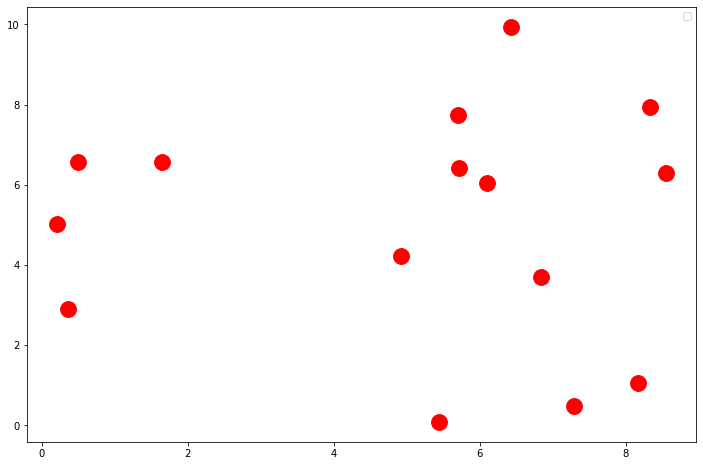

In [57]:
plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, s=250, c="r")
plt.legend()
plt.show()

In [0]:
import torch

In [59]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

print('requires_grad for x_train = ', x_train.requires_grad)
print('requires_grad for y_train = ', y_train.requires_grad)

requires_grad for x_train =  False
requires_grad for y_train =  False


In [0]:
input_size = 1
hidden_size = 1
output_size = 1

In [61]:
w1 = torch.rand(input_size, hidden_size, requires_grad=True)
w1.shape

torch.Size([1, 1])

In [62]:
w2 = torch.rand(hidden_size, output_size, requires_grad=True)
w2.shape

torch.Size([1, 1])

In [0]:
learning_rate = 0.000001

In [69]:
for iter in range(1, 100000):
  y_pred = x_train.float().mm(w1).mm(w2)
  loss = (y_pred - y_train).pow(2).sum()
  
  if iter % 50 == 0:
    print(iter, loss.item())

  loss.backward()

  with torch.no_grad():
    w1 -= learning_rate * w1.grad
    w2 -= learning_rate * w2.grad
    w1.grad.zero_()
    w2.grad.zero_()

50 456.00963927865
100 453.4676944198747
150 450.77509582633564
200 447.9257098071273
250 444.9136739203334
300 441.7334361879244
350 438.37994609422464
400 434.84866695806966
450 431.13576460529646
500 427.2381497176739
550 423.153679113325
600 418.8812610053955
650 414.42093525036006
700 409.7740493143983
750 404.9433623418755
800 399.9332326845541
850 394.74962177846794
900 389.40019012687253
950 383.894488350939
1000 378.2438495176153
1050 372.4614222467765
1100 366.5622537961173
1150 360.56314155540935
1200 354.4824471741253
1250 348.34008178128704
1300 342.1573759483199
1350 335.95666586111344
1400 329.7610120511715
1450 323.59422805443126
1500 317.4801999923136
1550 311.4426464426939
1600 305.50474065495433
1650 299.68888749732133
1700 294.0164258128912
1750 288.5069587200711
1800 283.1783282019621
1850 278.0465487063669
1900 273.1252950963212
1950 268.4258438476529
2000 263.95698638349546
2050 259.7253448419491
2100 255.73449015287943
2150 251.98629739137337
2200 248.4800055932

In [70]:
print('w1 :', w1)
print('w2 :', w2)

w1 : tensor([[0.8654]], requires_grad=True)
w2 : tensor([[0.8530]], requires_grad=True)


In [71]:
predicted_tensor = x_train.float().mm(w1).mm(w2)
predicted_tensor

tensor([[0.1590],
        [5.0478],
        [4.2116],
        [3.6286],
        [4.7465],
        [0.3694],
        [6.3122],
        [1.2176],
        [6.0254],
        [6.1533],
        [4.5017],
        [5.3843],
        [4.0159],
        [4.2189],
        [0.2650]], grad_fn=<MmBackward>)

In [72]:
predicted_numpy = predicted_tensor.detach().numpy()
predicted_numpy

array([[0.1590129],
       [5.0477676],
       [4.2116394],
       [3.628596 ],
       [4.746456 ],
       [0.3694043],
       [6.3122272],
       [1.2175794],
       [6.0253663],
       [6.1533403],
       [4.5016823],
       [5.384347 ],
       [4.015941 ],
       [4.2189407],
       [0.2649637]], dtype=float32)

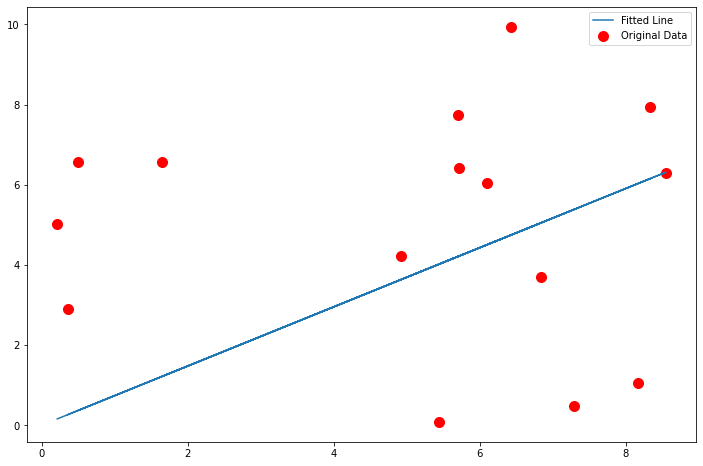

In [73]:
plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, label="Original Data", s=100, c="r")
plt.plot(x_train, predicted_numpy, label="Fitted Line")
plt.legend()
plt.show()